In [41]:
import torch
import torchaudio
import torchaudio.functional as F
import torchaudio.transforms as T

print(torch.__version__)
print(torchaudio.__version__)

import librosa
import matplotlib.pyplot as plt

2.1.1+cu121
2.1.1+cu121


In [26]:
import matplotlib.pyplot as plt
import torch
import torchaudio
from ay2.datasets.audio import MLAAD_AudioDs

In [8]:
ds = MLAAD_AudioDs(root_path=MLAAD_AudioDs.default_root_path)
data = ds.data

In [12]:
real_data = data.query("label == 1").sample(3)
fake_data = data.query("label == 0").sample(3)

In [20]:
path = real_data["audio_path"].iloc[0]

In [85]:
x, _ = torchaudio.load(path)
x = x[:, 16000*2: 16000 * 5]

In [64]:
n_fft = 400  # FFT的大小
win_length = n_fft  # 窗口长度
hop_length = win_length // 2  # 帧移长度
n_mels = 180  # 梅尔频率的数量

# 创建MelSpectrogram对象
mel_spectrogram = torchaudio.transforms.MelSpectrogram(
    sample_rate=sample_rate, n_fft=n_fft, win_length=win_length, hop_length=hop_length, n_mels=n_mels
)
# 计算Mel scale spectrogram
melspec = mel_spectrogram(x)[0]

/home/ay/anaconda3/envs/torch/lib/python3.9/site-packages/torchaudio/functional/functional.py:584: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (180) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


In [65]:
melspec.shape

torch.Size([180, 321])

In [66]:
# 计算方差图
variance_map = torch.var(melspec, dim=1)

print(variance_map.shape)  # 应该是(n_mels, time)

torch.Size([180])


In [67]:
from IPython.display import Audio
from matplotlib.patches import Rectangle
from torchaudio.utils import download_asset

torch.random.manual_seed(0)

SAMPLE_SPEECH = download_asset("tutorial-assets/Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042.wav")


def plot_waveform(waveform, sr, title="Waveform", ax=None):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sr

    if ax is None:
        _, ax = plt.subplots(num_channels, 1)
    ax.plot(time_axis, waveform[0], linewidth=1)
    ax.grid(True)
    ax.set_xlim([0, time_axis[-1]])
    ax.set_title(title)


def plot_spectrogram(specgram, title=None, ylabel="freq_bin", ax=None):
    if ax is None:
        _, ax = plt.subplots(1, 1, figsize=(20, 5))
    if title is not None:
        ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.imshow(librosa.power_to_db(specgram), origin="lower", aspect="auto", interpolation="nearest")


def plot_fbank(fbank, title=None):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or "Filter bank")
    axs.imshow(fbank, aspect="auto")
    axs.set_ylabel("frequency bin")
    axs.set_xlabel("mel bin")

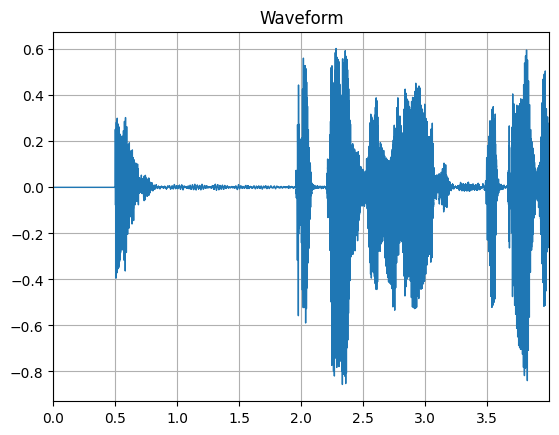

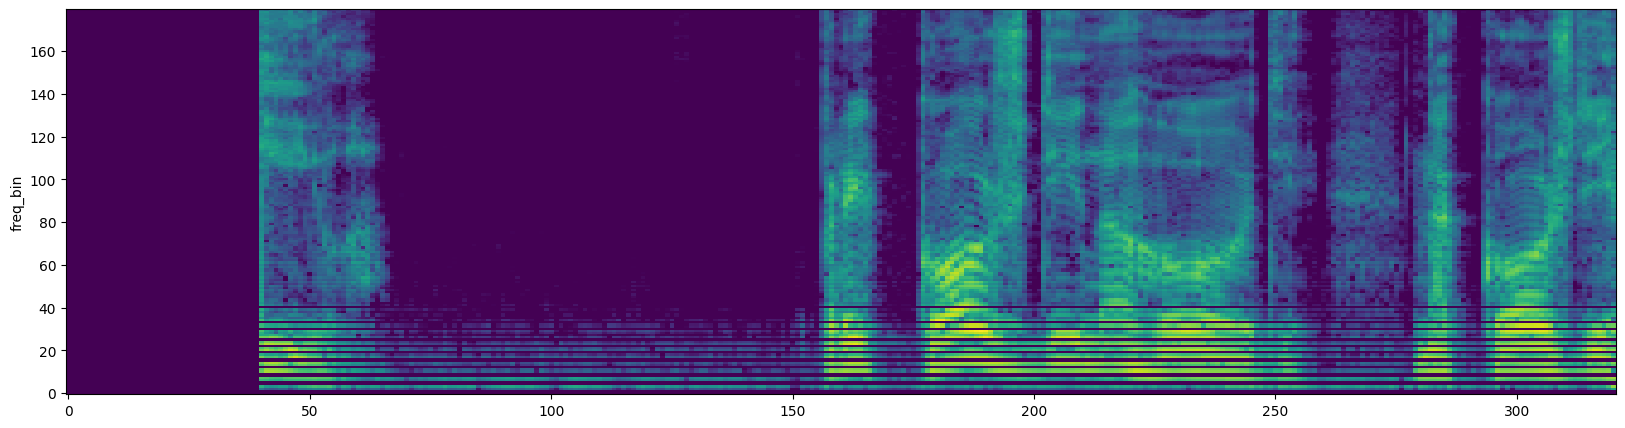

In [68]:
plot_waveform(x, sr=16000)
plot_spectrogram(melspec)

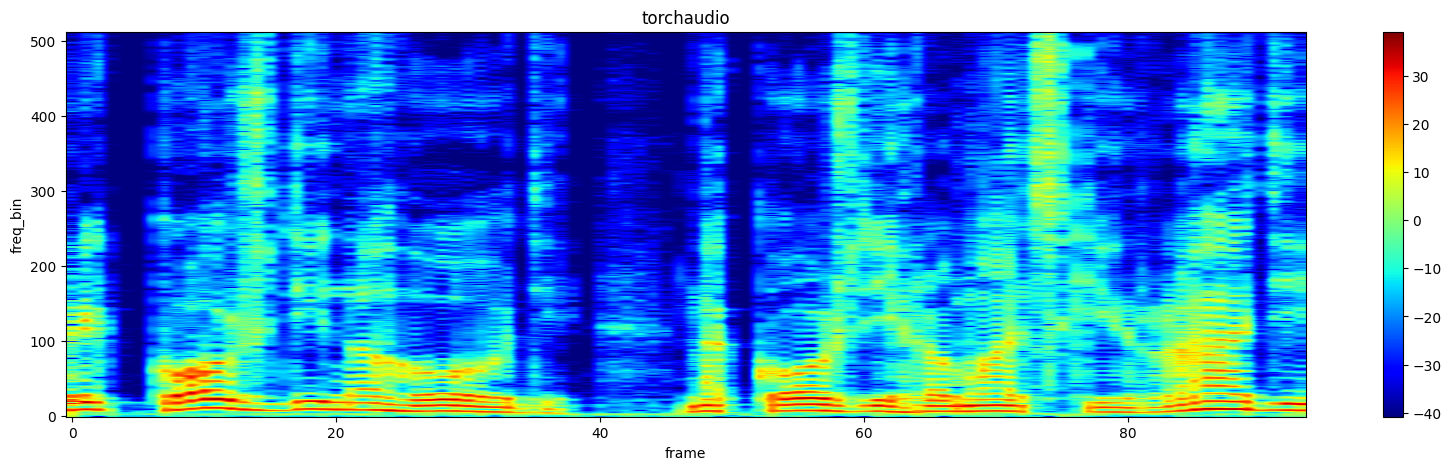

In [94]:
def plot_spectrogram(spec, title=None, ylabel="freq_bin", aspect="auto", xmax=None):
    fig, axs = plt.subplots(1, 1, figsize=(20, 5))
    axs.set_title(title or "Spectrogram (db)")
    axs.set_ylabel(ylabel)
    axs.set_xlabel("frame")
    im = axs.imshow(librosa.power_to_db(spec), origin="lower", aspect=aspect, cmap="jet")
    if xmax:
        axs.set_xlim((0, xmax))
    fig.colorbar(im, ax=axs)
    plt.show(block=False)


waveform = x

n_fft = 1024
win_length = None
hop_length = 512

# define transformation
spectrogram = T.Spectrogram(
    n_fft=n_fft,
    win_length=win_length,
    hop_length=hop_length,
    center=True,
    pad_mode="reflect",
    power=2.0,
)
# Perform transformation
spec = spectrogram(waveform)

plot_spectrogram(spec[0], title="torchaudio")

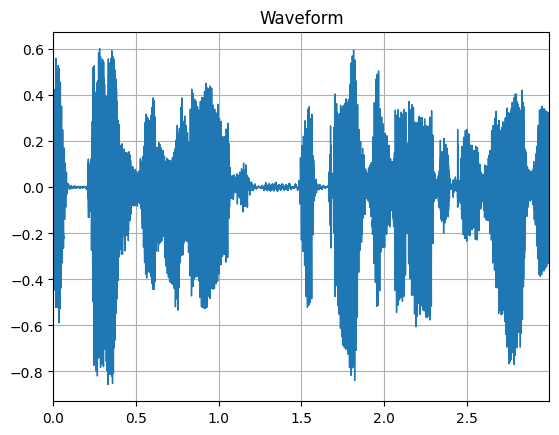

In [95]:
plot_waveform(x, sr=16000)